# Pytorch Tutorial

Following DATAI guide (https://www.kaggle.com/kanncaa1/pytorch-tutorial-for-deep-learning-lovers)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv']


In [2]:
import torch
import matplotlib.pyplot as plt
from torch.autograd import Variable
import torchvision.transforms as transforms
import torch.nn as nn 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

## Linear Regression

Simple Linear Regression Example using Pytorch

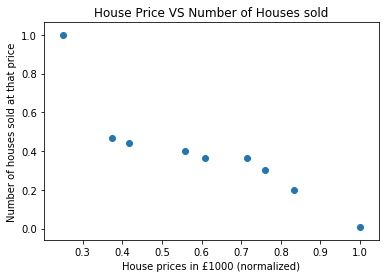

In [3]:
house_price_k = [300,450,500,670,730,858,912,1000,1200]
house_price_k = np.array(house_price_k,dtype=np.float32)
# Normalize data to prevent inf loss
house_price_k = house_price_k/house_price_k.max(axis=0)
house_price_k = house_price_k.reshape(-1,1)
house_price_k = Variable(torch.from_numpy(house_price_k))

houses_sold = [150,70,66,60,55,55,45,30,1]
houses_sold = np.array(houses_sold,dtype=np.float32)
# Normalize data to prevent inf loss
houses_sold = houses_sold/houses_sold.max(axis=0)
houses_sold = houses_sold.reshape(-1,1)
houses_sold = Variable(torch.from_numpy(houses_sold))

plt.scatter(house_price_k,houses_sold)
plt.xlabel("House prices in £1000 (normalized)")
plt.ylabel("Number of houses sold at that price")
plt.title("House Price VS Number of Houses sold")
plt.show()

epoch 0, loss 1.5299993753433228
epoch 150, loss 0.013502690009772778
epoch 300, loss 0.013489937409758568
epoch 450, loss 0.013489938341081142
epoch 600, loss 0.013489934615790844
epoch 750, loss 0.013489934615790844
epoch 900, loss 0.013489934615790844
epoch 1050, loss 0.013489934615790844
epoch 1200, loss 0.013489934615790844
epoch 1350, loss 0.013489934615790844
epoch 1500, loss 0.013489934615790844
epoch 1650, loss 0.013489934615790844
epoch 1800, loss 0.013489934615790844
epoch 1950, loss 0.013489934615790844
epoch 2100, loss 0.013489934615790844
epoch 2250, loss 0.013489934615790844
epoch 2400, loss 0.013489934615790844
epoch 2550, loss 0.013489934615790844
epoch 2700, loss 0.013489934615790844
epoch 2850, loss 0.013489934615790844
epoch 3000, loss 0.013489934615790844
epoch 3150, loss 0.013489934615790844
epoch 3300, loss 0.013489934615790844
epoch 3450, loss 0.013489934615790844
epoch 3600, loss 0.013489934615790844
epoch 3750, loss 0.013489934615790844
epoch 3900, loss 0.0134

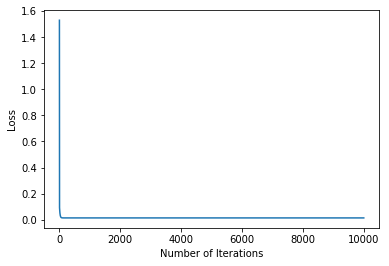

In [4]:
class LinearRegression(nn.Module):
    def __init__(self,input_size,output_size):
        # super function. It inherits from nn.Module and 
        # we can access everything in nn.Module
        super(LinearRegression,self).__init__()
        # Linear function.
        self.linear = nn.Linear(input_dim,output_dim)

    def forward(self,x):
        return self.linear(x)
    
# define model
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim,output_dim) # input and output size are 1

# MSE
mse = nn.MSELoss()

# Optimization (find parameters that minimize error)
learning_rate = 0.4  # how fast we reach best parameters
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

# train model
loss_list = []
iteration_number = 10000
for iteration in range(iteration_number):
        
    # optimization
    optimizer.zero_grad() 
    
    # Forward to get output
    results = model(house_price_k)
    
    # Calculate Loss
    loss = mse(results, houses_sold)
    
    # backward propagation
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # store loss
    loss_list.append(loss.data)
    
    # print loss
    if(iteration %150== 0):
        print('epoch {}, loss {}'.format(iteration, loss.data))

plt.plot(range(iteration_number),loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()

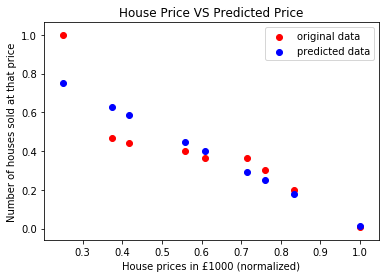

In [5]:
# predict our car price 
predicted = model(house_price_k).data.numpy()
plt.scatter(house_price_k,houses_sold,label = "original data",color ="red")
plt.scatter(house_price_k,predicted,label = "predicted data",color ="blue")
plt.legend()
plt.xlabel("House prices in £1000 (normalized)")
plt.ylabel("Number of houses sold at that price")
plt.title("House Price VS Predicted Price")
plt.show()

# Logistic Regression

Linear Regression can lead to better results than Linear Regression for Classification porpuses

Logistic Regression = Linear Regression + Logistic Function(softmax)

Logistic regression is good at classification but when complexity(non linearity) increases, the accuracy of model decreases.

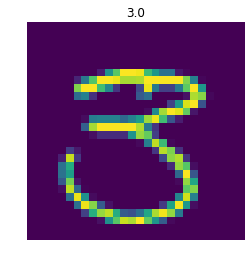

In [6]:
# Prepare Dataset
# load data
train = pd.read_csv(r"../input/train.csv",dtype = np.float32)

# split data into features(pixels) and labels(numbers from 0 to 9)
targets_numpy = train.label.values
features_numpy = train.loc[:,train.columns != "label"].values/255 # normalization

# train test split. Size of train data is 80% and size of test data is 20%. 
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,
                                                                             targets_numpy,
                                                                             test_size = 0.2,
                                                                             random_state = 42) 

# create feature and targets tensor for train set. As you remember we need variable to accumulate gradients. Therefore first we create tensor, then we will create variable
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set.
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor) # data type is long

# batch_size, epoch and iteration
batch_size = 100
n_iters = 50000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)

# visualize one of the images in data set
plt.imshow(features_numpy[7].reshape(28,28))
plt.axis("off")
plt.title(str(targets_numpy[7]))
plt.savefig('graph.png')
plt.show()

In [7]:
# Create Logistic Regression Model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        # Linear part
        self.linear = nn.Linear(input_dim, output_dim)
        # There should be logistic function right?
        # However logistic function in pytorch is in loss function
        # So actually we do not forget to put it, it is only at next parts
    
    def forward(self, x):
        out = self.linear(x)
        return out

# Instantiate Model Class
input_dim = 28*28 # size of image px*px
output_dim = 10  # labels 0,1,2,3,4,5,6,7,8,9

# create logistic regression model
model = LogisticRegressionModel(input_dim, output_dim)

# Cross Entropy Loss  
error = nn.CrossEntropyLoss()

# SGD Optimizer 
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [8]:
# Traning the Model
count = 0
loss_list = []
iteration_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        # Define variables
        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and cross entropy loss
        loss = error(outputs, labels)
        
        # Calculate gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        # Prediction
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader: 
                test = Variable(images.view(-1, 28*28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
        if count % 700 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {}%'.format(count, loss.data, accuracy))

Iteration: 700  Loss: 1.7678580284118652  Accuracy: 71%
Iteration: 1400  Loss: 1.4187887907028198  Accuracy: 77%
Iteration: 2100  Loss: 1.135074257850647  Accuracy: 79%
Iteration: 2800  Loss: 1.0227187871932983  Accuracy: 81%
Iteration: 3500  Loss: 0.9017693996429443  Accuracy: 82%
Iteration: 4200  Loss: 0.8971323370933533  Accuracy: 82%
Iteration: 4900  Loss: 0.7907500267028809  Accuracy: 83%
Iteration: 5600  Loss: 0.8370683789253235  Accuracy: 84%
Iteration: 6300  Loss: 0.6618599891662598  Accuracy: 84%
Iteration: 7000  Loss: 0.7134055495262146  Accuracy: 84%
Iteration: 7700  Loss: 0.6634719967842102  Accuracy: 85%
Iteration: 8400  Loss: 0.5648887753486633  Accuracy: 85%
Iteration: 9100  Loss: 0.6367565393447876  Accuracy: 85%
Iteration: 9800  Loss: 0.6771481037139893  Accuracy: 85%
Iteration: 10500  Loss: 0.5320725440979004  Accuracy: 85%
Iteration: 11200  Loss: 0.6205548644065857  Accuracy: 85%
Iteration: 11900  Loss: 0.5510497093200684  Accuracy: 86%
Iteration: 12600  Loss: 0.6348

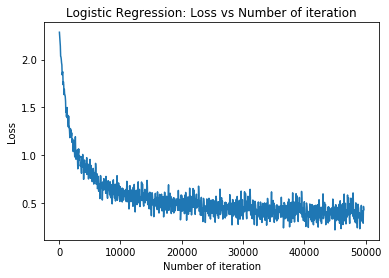

In [9]:
# visualization
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("Logistic Regression: Loss vs Number of iteration")
plt.show()

# Artificial Neural Network (ANN)

ANNs are able to better fit data containing non-linearities (by adding more non linear functions as hidden layer)

In [10]:
# Create ANN Model
class ANNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        # Linear function 1: 784 --> 100
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity 1
        self.relu1 = nn.ReLU()
        
        # Linear function 2: 100 --> 100
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.tanh2 = nn.Tanh()
        
        # Linear function 3: 100 --> 100
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 3
        self.elu3 = nn.ELU()
        
        # Linear function 4 (readout): 100 --> 10
        self.fc4 = nn.Linear(hidden_dim, output_dim)  
    
    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)
        
        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.tanh2(out)
        
        # Linear function 2
        out = self.fc3(out)
        # Non-linearity 2
        out = self.elu3(out)
        
        # Linear function 4 (readout)
        out = self.fc4(out)
        return out

# instantiate ANN
input_dim = 28*28
hidden_dim = 100 #hidden layer dim is one of the hyper parameter and it should be chosen and tuned. For now I only say 150 there is no reason.
output_dim = 10

# Create ANN
model = ANNModel(input_dim, hidden_dim, output_dim)

# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.04
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [11]:
# ANN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader:

                test = Variable(images.view(-1, 28*28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)

                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
            if count % 500 == 0:
                # Print Loss
                print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data.item(), accuracy))

Iteration: 500  Loss: 0.44547438621520996  Accuracy: 86 %
Iteration: 1000  Loss: 0.302815705537796  Accuracy: 90 %
Iteration: 1500  Loss: 0.1231832280755043  Accuracy: 92 %
Iteration: 2000  Loss: 0.19104915857315063  Accuracy: 93 %
Iteration: 2500  Loss: 0.1761694699525833  Accuracy: 94 %
Iteration: 3000  Loss: 0.07308691740036011  Accuracy: 95 %
Iteration: 3500  Loss: 0.19082306325435638  Accuracy: 95 %
Iteration: 4000  Loss: 0.027083057910203934  Accuracy: 95 %
Iteration: 4500  Loss: 0.14932426810264587  Accuracy: 95 %
Iteration: 5000  Loss: 0.05842341482639313  Accuracy: 96 %
Iteration: 5500  Loss: 0.1404922604560852  Accuracy: 95 %
Iteration: 6000  Loss: 0.10998567938804626  Accuracy: 96 %
Iteration: 6500  Loss: 0.07648640125989914  Accuracy: 96 %
Iteration: 7000  Loss: 0.0356624498963356  Accuracy: 96 %
Iteration: 7500  Loss: 0.04366530850529671  Accuracy: 96 %
Iteration: 8000  Loss: 0.14773298799991608  Accuracy: 96 %
Iteration: 8500  Loss: 0.010381107218563557  Accuracy: 96 %
It

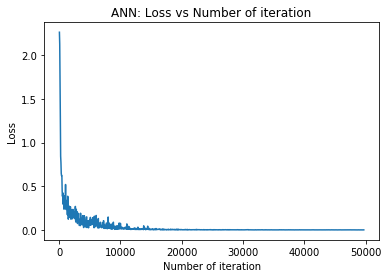

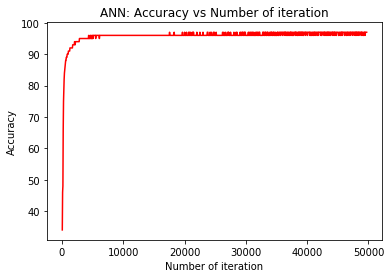

In [12]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()

# Convolutional Neural Network (CNN)

In [13]:
# Create CNN Model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.relu1 = nn.ReLU()
        
        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
     
        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0)
        self.relu2 = nn.ReLU()
        
        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        
        # Fully connected 1
        self.fc1 = nn.Linear(32 * 4 * 4, 10) 
    
    def forward(self, x):
        # Convolution 1
        out = self.cnn1(x)
        out = self.relu1(out)
        
        # Max pool 1
        out = self.maxpool1(out)
        
        # Convolution 2 
        out = self.cnn2(out)
        out = self.relu2(out)
        
        # Max pool 2 
        out = self.maxpool2(out)
        out = out.view(out.size(0), -1)

        # Linear function (readout)
        out = self.fc1(out)
        
        return out

# batch_size, epoch and iteration
batch_size = 100
n_iters = 2500
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)
    
# Create ANN
model = CNNModel()

# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [14]:
# CNN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        train = Variable(images.view(100,1,28,28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        count += 1
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                
                test = Variable(images.view(100,1,28,28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)
                
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
            if count % 500 == 0:
                # Print Loss
                print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data.item, accuracy))

Iteration: 500  Loss: <built-in method item of Tensor object at 0x7efbcadf7438>  Accuracy: 96 %
Iteration: 1000  Loss: <built-in method item of Tensor object at 0x7efbac7185a0>  Accuracy: 97 %
Iteration: 1500  Loss: <built-in method item of Tensor object at 0x7efbac7185a0>  Accuracy: 97 %
Iteration: 2000  Loss: <built-in method item of Tensor object at 0x7efbac713120>  Accuracy: 98 %


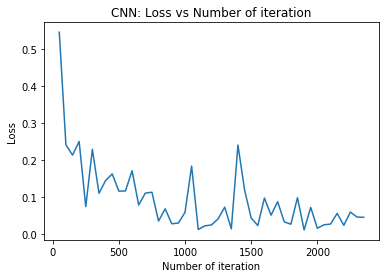

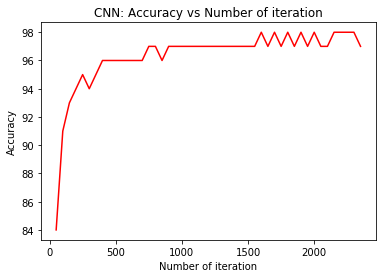

In [15]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("CNN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("CNN: Accuracy vs Number of iteration")
plt.show()

# Recurrent Neural Network (RNN)

In [16]:
# Create RNN Model
class RNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(RNNModel, self).__init__()
        # Number of hidden dimensions
        self.hidden_dim = hidden_dim
        
        # Number of hidden layers
        self.layer_dim = layer_dim
        
        # RNN
        self.rnn = nn.RNN(input_dim, hidden_dim, layer_dim, batch_first=True, 
                          nonlinearity='relu')
        
        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim))
            
        # One time step
        out, hn = self.rnn(x, h0)
        out = self.fc(out[:, -1, :]) 
        return out

# batch_size, epoch and iteration
batch_size = 100
n_iters = 2500
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)
    
# Create RNN
input_dim = 28    # input dimension
hidden_dim = 100  # hidden layer dimension
layer_dim = 2     # number of hidden layers
output_dim = 10   # output dimension

model = RNNModel(input_dim, hidden_dim, layer_dim, output_dim)

# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.05
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [17]:
seq_dim = 28  
loss_list = []
iteration_list = []
accuracy_list = []
count = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        train  = Variable(images.view(-1, seq_dim, input_dim))
        labels = Variable(labels )
            
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        if count % 250 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                images = Variable(images.view(-1, seq_dim, input_dim))
                
                # Forward propagation
                outputs = model(images)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += labels.size(0)
                
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
            if count % 500 == 0:
                # Print Loss
                print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data.item(), accuracy))

Iteration: 500  Loss: 2.258598804473877  Accuracy: 18 %
Iteration: 1000  Loss: 0.8783552050590515  Accuracy: 70 %
Iteration: 1500  Loss: 0.31326964497566223  Accuracy: 89 %
Iteration: 2000  Loss: 0.34956154227256775  Accuracy: 89 %


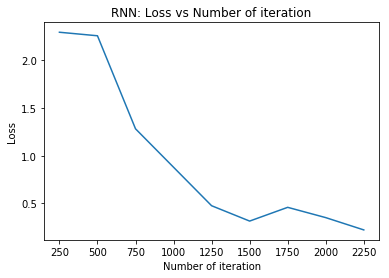

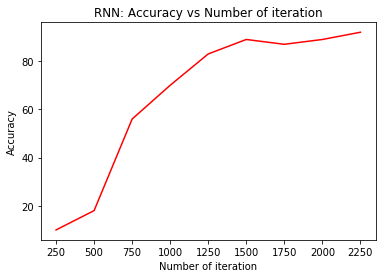

In [18]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("RNN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("RNN: Accuracy vs Number of iteration")
plt.savefig('graph.png')
plt.show()